In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = '/Users/amirrezakamkar/Desktop/Works_in_progress/Ironhack/final_project/Data/clean/fossil_CO2_totals_by_country_clean.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,CO2,AGO,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,CO2,AIA,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,CO2,AIR,International Aviation,169.300997,169.300997,179.147487,186.892096,179.793331,173.866020,174.273791,...,472.721119,480.909126,496.627697,524.654034,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250


In [7]:
#droping obvious unnecessary columns.
df = df.drop(columns=['Substance', 'EDGAR Country Code'])

In [9]:
df.isnull().sum()

Country    0
1970       0
1971       0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
#removing the rows which shows the co2 emission in total and for EU.
df = df[~df["Country"].isin(['EU27', 'GLOBAL TOTAL'])]

In [17]:
df.Country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla',
       'International Aviation', 'Albania', 'Curacao',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland and Liechtenstein', 'Chile', 'China',
       'Cote dIvoire', 'Cameroon', 'Democratic Republic of the Congo',
       'Congo', 'Cook Islands', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Cayman Islands', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara',
       'Spain and Andorra', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       

In [21]:
#changing the shape of the dataframe.
df_melted = df.melt(id_vars=["Country"], var_name="Year", value_name="CO2_Emissions")

In [23]:
df_melted.head()

,Country,Year,CO2_Emissions
0,Aruba,1970,0.081876
1,Afghanistan,1970,1.739541
2,Angola,1970,8.952570
3,Anguilla,1970,0.002168
4,International Aviation,1970,169.300997


In [25]:
df_melted.isnull().sum()

Country          0
Year             0
CO2_Emissions    0
dtype: int64

In [27]:
df_melted.shape

(10920, 3)

In [29]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        10920 non-null  object 
 1   Year           10920 non-null  object 
 2   CO2_Emissions  10920 non-null  float64
dtypes: float64(1), object(2)
memory usage: 256.1+ KB


In [31]:
df_melted["Year"] = df_melted["Year"].astype(int)

In [33]:
# comparing average co2 emission in each decade.
bins = [1970, 1980, 1990, 2000, 2010, 2021]
labels = ["1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2021"]

df_melted["Decade"] = pd.cut(df_melted["Year"], bins=bins, labels=labels, right=False)

co2_per_bin_sum = df_melted.groupby("Decade")["CO2_Emissions"].sum().reset_index()

co2_per_bin_sum

/var/folders/kh/bjfqwck131971mz369pxctvm0000gn/T/ipykernel_46880/4183757337.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_per_bin_sum = df_melted.groupby("Decade")["CO2_Emissions"].sum().reset_index()


,Decade,CO2_Emissions
0,1970-1979,180451.499686
1,1980-1989,206709.954551
2,1990-1999,236825.392366
3,2000-2009,293954.557474
4,2010-2021,399221.879275


In [35]:
co2_per_bin_sum["Percentage_Increase"] = co2_per_bin_sum["CO2_Emissions"].pct_change() * 100

co2_per_bin_sum

,Decade,CO2_Emissions,Percentage_Increase
0,1970-1979,180451.499686,NaN
1,1980-1989,206709.954551,14.551530
2,1990-1999,236825.392366,14.568934
3,2000-2009,293954.557474,24.122905
4,2010-2021,399221.879275,35.810747


In [35]:
co2_per_bin_sum.to_csv("co2_per_bin_sum.csv", index=False)

In [37]:
# comparing the co2 emission of the top 10 economies in 1970 and all the other countries.
top_10_economies = [
    "United States", "Australia", "Japan", "Germany", "United Kingdom",
    "Spain", "France and Monaco", "Italy, San Marino and the Holy See", "Canada", "Mexico"
]

df_1970 = df_melted[df_melted["Year"] == 1970]


top_10_sum = df_1970[df_1970["Country"].isin(top_10_economies)]["CO2_Emissions"].sum()
other_countries_sum = df_1970[~df_1970["Country"].isin(top_10_economies)]["CO2_Emissions"].sum()

print(f"Sum of CO2 emissions for Top 10 economies in 1970: {top_10_sum}")
print(f"Sum of CO2 emissions for other countries in 1970: {other_countries_sum}")


Sum of CO2 emissions for Top 10 economies in 1970: 8750.2670582
Sum of CO2 emissions for other countries in 1970: 7370.5798857071495


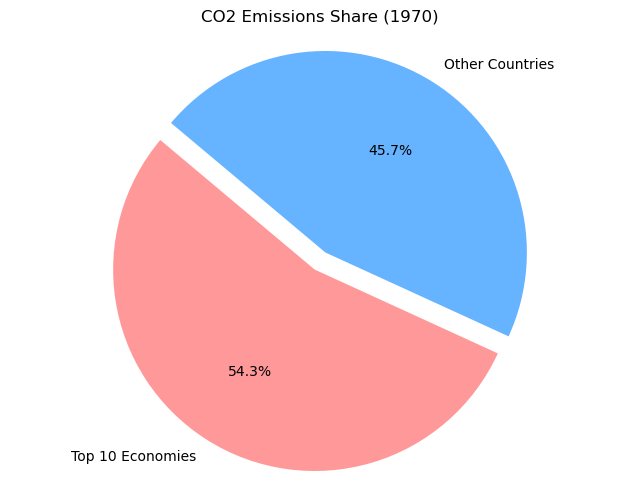

In [39]:
labels = ["Top 10 Economies", "Other Countries"]
sizes = [top_10_sum, other_countries_sum]  
colors = ["#ff9999", "#66b3ff"] 
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title("CO2 Emissions Share (1970)")
plt.axis('equal')
plt.show()


In [41]:
# comparing the co2 emission of the top 10 economies in 2021 and all the other countries.
top_10_economies = [
    "United States", "China", "Japan", "Germany", "United Kingdom",
    "India", "France and Monaco", "Italy, San Marino and the Holy See", "Canada", "South Korea"
]

df_2021 = df_melted[df_melted["Year"] == 2021]


top_10_sum = df_2021[df_2021["Country"].isin(top_10_economies)]["CO2_Emissions"].sum()
other_countries_sum = df_2021[~df_2021["Country"].isin(top_10_economies)]["CO2_Emissions"].sum()

print(f"Sum of CO2 emissions for Top 10 economies in 2021: {top_10_sum}")
print(f"Sum of CO2 emissions for other countries in 2021: {other_countries_sum}")


Sum of CO2 emissions for Top 10 economies in 2021: 23765.4467427
Sum of CO2 emissions for other countries in 2021: 14092.129014692495


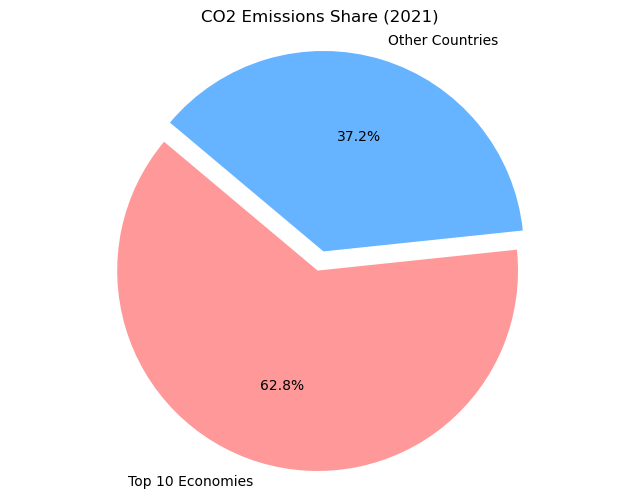

In [43]:
labels = ["Top 10 Economies", "Other Countries"]
sizes = [top_10_sum, other_countries_sum]  
colors = ["#ff9999", "#66b3ff"] 
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title("CO2 Emissions Share (2021)")
plt.axis('equal')
plt.show()


In [45]:
# calculating the co2 emission of China and USA in 2021 and compare it to all the other countries.
us_china_df = df[df["Country"].isin(["United States", "China"])]

us_china_total = us_china_df["2021"].sum()

# Step 3: Calculate the total CO2 emissions for all countries
global_total = df["2021"].sum()

# Step 4: Compute the percentage
percentage = (us_china_total / global_total) * 100

# Output
print(f"Total CO2 emissions for United States and China: {us_china_total}")
print(f"Total CO2 emissions globally: {global_total}")
print(f"Percentage contribution by United States and China: {percentage:.2f}%")

Total CO2 emissions for United States and China: 17218.3953
Total CO2 emissions globally: 37857.57575739249
Percentage contribution by United States and China: 45.48%


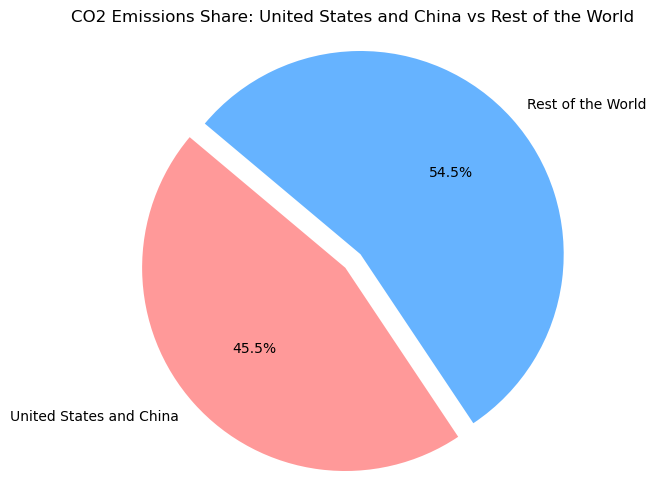

In [47]:
labels = ["United States and China", "Rest of the World"]
us_china_emissions = us_china_total
rest_of_world_emissions = global_total - us_china_total
sizes = [us_china_emissions, rest_of_world_emissions] 
colors = ["#ff9999", "#66b3ff"] 


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.1, 0))
plt.title("CO2 Emissions Share: United States and China vs Rest of the World")
plt.axis('equal')  
plt.show()

In [49]:
# Comparing co2 emission for usa in each decade.
df_usa = df_melted[
    (df_melted["Country"] == "United States")
]

bins = [1970, 1980, 1990, 2000, 2010, 2021]
labels = ["1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2021"]

df_usa = df_usa.assign(
    Decade=pd.cut(df_usa["Year"], bins=bins, labels=labels, right=False)
)

usa_decade = df_usa.groupby("Decade")["CO2_Emissions"].sum().reset_index()
usa_decade["Percentage_Increase"] = usa_decade["CO2_Emissions"].pct_change() * 100

usa_decade


/var/folders/kh/bjfqwck131971mz369pxctvm0000gn/T/ipykernel_31796/886110960.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usa_decade = df_usa.groupby("Decade")["CO2_Emissions"].sum().reset_index()


,Decade,CO2_Emissions,Percentage_Increase
0,1970-1979,48645.017768,NaN
1,1980-1989,48250.295949,-0.811433
2,1990-1999,54058.102241,12.036830
3,2000-2009,58352.628717,7.944279
4,2010-2021,56527.364353,-3.127990


In [51]:
usa_decade.to_csv("usa_decades.csv", index=False)

In [53]:
# Comparing co2 emission for china in each decade.
df_china = df_melted[
    (df_melted["Country"] == "China")
]

bins = [1970, 1980, 1990, 2000, 2010, 2021]
labels = ["1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2021"]

df_china = df_china.assign(
    Decade=pd.cut(df_china["Year"], bins=bins, labels=labels, right=False)
)

china_decade = df_china.groupby("Decade")["CO2_Emissions"].sum().reset_index()
china_decade["Percentage_Increase"] = china_decade["CO2_Emissions"].pct_change() * 100

china_decade

/var/folders/kh/bjfqwck131971mz369pxctvm0000gn/T/ipykernel_31796/3789746281.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  china_decade = df_china.groupby("Decade")["CO2_Emissions"].sum().reset_index()


,Decade,CO2_Emissions,Percentage_Increase
0,1970-1979,11812.750752,NaN
1,1980-1989,19037.995184,61.164792
2,1990-1999,30997.971607,62.821617
3,2000-2009,59649.368652,92.429909
4,2010-2021,119434.742076,100.228007


In [55]:
china_decade.to_csv("china_decades.csv", index=False)

In [57]:
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,0.105305,0.106662,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,2.288853,1.940763,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,12.057774,14.239234,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,0.002537,0.002902,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,International Aviation,169.300997,169.300997,179.147487,186.892096,179.793331,173.866020,174.273791,190.068978,197.222628,...,472.721119,480.909126,496.627697,524.654034,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250


In [72]:
top_10_economies = [
    "United States", "China", "Japan", "Germany", "United Kingdom",
    "India", "France", "Italy", "Canada", "South Korea"
]
sum_2010 = df[df["Country"].isin(top_10_economies)]["2010"].sum()
sum_2010

20316.971200399996

In [74]:
sum_2021 = df[df["Country"].isin(top_10_economies)]["2021"].sum()
sum_2021

23143.4506566

In [76]:
from scipy.stats import ttest_rel

# Null Hypothesis (H0): There is no significant difference between the sums for 2010 and 2021.
# Alternative Hypothesis (Ha​): There is a significant difference between the sums for 2010 and 2021.

data_2010 = df[df["Country"].isin(top_10_economies)]["2010"]
data_2021 = df[df["Country"].isin(top_10_economies)]["2021"]

# Apply paired t-test
t_stat, p_value = ttest_rel(data_2010, data_2021)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The change is statistically significant.")
else:
    print("The change is not statistically significant.")


T-statistic: -0.8109184850116352
P-value: 0.44410517023682206
The change is not statistically significant.


In [86]:
# checking the possible decrease in co2 emission for top 10 most environmentally friendly countries between 2010 and 2021
# source: https://worldpopulationreview.com/country-rankings/most-environmentally-friendly-countries
top_10_green = ["Estonia", "Luxembourg", "Germany", "Finland", "United Kingdom", 
                "Sweden", "Norway", "Austria", "Switzerland", "Denmark"
               ]
sum_2010_green = df[df["Country"].isin(top_10_green)]["2010"].sum()
sum_2021_green = df[df["Country"].isin(top_10_green)]["2021"].sum()

print("The total co2 emission of top 10 most environmentally friendly countries in 2010 is ", sum_2010_green)
print("The total co2 emission of top 10 most environmentally friendly countries in 2021 is ",sum_2021_green)

The total co2 emission of top 10 most environmentally friendly countries in 2010 is  1647.9801168099998
The total co2 emission of top 10 most environmentally friendly countries in 2021 is  1238.1301258980002


In [92]:
#Hypothesis test
#Null Hypothesis (H0​): There is no significant difference in the CO2 emissions of the top 10 green countries between 2010 and 2021
#Alternative Hypothesis (Ha​): There is a significant difference in the CO2 emissions

data_2010_green = df[df["Country"].isin(top_10_green)]["2010"]
data_2021_green = df[df["Country"].isin(top_10_green)]["2021"]

t_stat, p_value = ttest_rel(data_2010_green, data_2021_green)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


if p_value < 0.1:
    print("The change in CO2 emissions is statistically significant.")
else:
    print("The change in CO2 emissions is not statistically significant.")

T-statistic: 2.0971008935432187
P-value: 0.06924909609138197
The change in CO2 emissions is statistically significant.


In [94]:
sum_2010_green = df[df["Country"].isin(top_10_green)]["2010"].sum()
sum_2021_green = df[df["Country"].isin(top_10_green)]["2021"].sum()

df_summary = pd.DataFrame({
    "Year": [2010, 2021],
    "Total_CO2_Emissions": [sum_2010_green, sum_2021_green]
})

df_summary

,Year,Total_CO2_Emissions
0,2010,1647.980117
1,2021,1238.130126


In [96]:
df_summary.to_csv("green_countries_2010_2021_comparison.csv", index=False)